#  Customer Churn Prediction

Import the required libraries.
Read the CSV

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\pratikk\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df=pd.read_csv(r'C:\Users\pratikk\Desktop\Sentimental_Churn\churn_new.csv') #reading the CSV file

In [3]:
df.head()

,Unnamed: 0,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,0,KS,128,415,382-4657,no,yes,25,265.1,110,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False.
1,1,OH,107,415,371-7191,no,yes,26,161.6,123,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,2,NJ,137,415,358-1921,no,no,0,243.4,114,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,3,OH,84,408,375-9999,yes,no,0,299.4,71,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,4,OK,75,415,330-6626,yes,no,0,166.7,113,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [4]:
df.describe()

,Unnamed: 0,Account Length,VMail Message,Day Mins,Day Calls,Eve Charge,Night Mins,Night Calls,Intl Mins,CustServ Calls
count,3333.00000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,1666.00000,101.064806,8.099010,179.775098,100.435644,17.083540,200.872037,100.107711,10.237294,1.562856
std,962.29855,39.822106,13.688365,54.467389,20.069084,4.310668,50.573847,19.568609,2.791840,1.315491
min,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,0.000000,0.000000
25%,833.00000,74.000000,0.000000,143.700000,87.000000,14.160000,167.000000,87.000000,8.500000,1.000000
50%,1666.00000,101.000000,0.000000,179.400000,101.000000,17.120000,201.200000,100.000000,10.300000,1.000000
75%,2499.00000,127.000000,20.000000,216.400000,114.000000,20.000000,235.300000,113.000000,12.100000,2.000000
max,3332.00000,243.000000,51.000000,350.800000,165.000000,30.910000,395.000000,175.000000,20.000000,9.000000


In [5]:
del df['Unnamed: 0'] #deleting the Unnamed : 0 column 

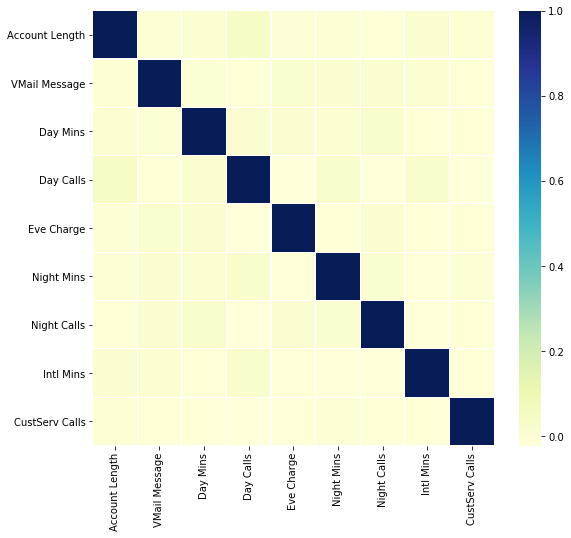

In [6]:
corrmat = df.corr() 
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000232C66F32B0>,
      dtype=object)

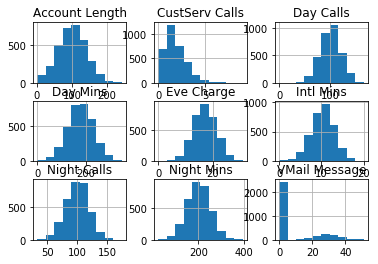

In [7]:
df.hist(df.columns)

In [8]:
df = df.replace('?', np.NaN) #replacing the '?' values  with NaN

In [9]:
df['Churn?'].replace('False.', 1, inplace=True) #Converting the values of feature to binary.
df['Churn?'].replace('True.', 0, inplace=True)

In [10]:
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,NaN,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,1
1,OH,107,415,371-7191,no,yes,26,161.6,123,NaN,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,1
2,NJ,137,415,358-1921,no,no,0,243.4,114,NaN,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,1
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1


In [11]:
df['Int\'l Plan'] = df['Int\'l Plan'].map({'yes': 0, 'no': 1}) #Converting the values of feature to binary.
df['VMail Plan'] = df['VMail Plan'].map({'yes': 0, 'no': 1})

In [12]:
df['Area Code'].mode() #Calculating the Mode to replace the NaN values for the Area Code feature

0    415
dtype: object

In [13]:
df['Area Code']=df['Area Code'].fillna(415)
df['Area Code'].isnull().sum(axis = 0)

0

In [14]:
df['VMail Plan'].mode()

0    1.0
dtype: float64

In [15]:
df['VMail Plan']=df['VMail Plan'].fillna(0.0)
df['VMail Plan'].isnull().sum(axis = 0)

0

In [16]:
df['Int\'l Plan'].mode()

0    1.0
dtype: float64

In [17]:
df['Int\'l Plan']=df['Int\'l Plan'].fillna(0.0)
df['Int\'l Plan'].isnull().sum(axis = 0)

0

In [18]:
df.isnull().sum()

State               0
Account Length      0
Area Code           0
Phone               0
Int'l Plan          0
VMail Plan          0
VMail Message       0
Day Mins            0
Day Calls           0
Day Charge        112
Eve Mins           88
Eve Calls         520
Eve Charge          0
Night Mins          0
Night Calls         0
Night Charge      310
Intl Mins           0
Intl Calls        662
Intl Charge       352
CustServ Calls      0
Churn?              0
dtype: int64

In [19]:
df['Night Charge'].median(axis = 0, skipna = True) #Calculating the Median to replace the NaN values for the Night Charge feature

9.04

In [20]:
df['Night Charge']=df['Night Charge'].fillna(9.04)
df['Night Charge'].isnull().sum(axis = 0)

0

In [21]:
df['Day Charge'].median(axis = 0, skipna = True)

30.5

In [22]:
df['Day Charge']=df['Day Charge'].fillna(30.5)
df['Day Charge'].isnull().sum(axis = 0)

0

In [23]:
df['Eve Mins'].median(axis = 0, skipna = True)

201.5

In [24]:
df['Eve Mins']=df['Eve Mins'].fillna(201.5)
df['Eve Mins'].isnull().sum(axis = 0)

0

In [25]:
df['Eve Calls'].median(axis = 0, skipna = True)

100.0

In [26]:
df['Eve Calls']=df['Eve Calls'].fillna(100.0)
df['Eve Calls'].isnull().sum(axis = 0)

0

In [27]:
df['Intl Calls'].median(axis = 0, skipna = True)

4.0

In [28]:
df['Intl Calls']=df['Intl Calls'].fillna(4.0)
df['Intl Calls'].isnull().sum(axis = 0)

0

In [29]:
df['Intl Charge'].median(axis = 0, skipna = True)

2.78

In [30]:
df['Intl Charge']=df['Intl Charge'].fillna(2.78)
df['Intl Charge'].isnull().sum(axis = 0)

0

In [31]:
df.isnull().sum()

State             0
Account Length    0
Area Code         0
Phone             0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn?            0
dtype: int64

In [32]:
df.describe()

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Eve Charge,Night Mins,Night Calls,Intl Mins,CustServ Calls,Churn?
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.758776,0.650165,8.099010,179.775098,100.435644,17.083540,200.872037,100.107711,10.237294,1.562856,0.855086
std,39.822106,0.427890,0.476989,13.688365,54.467389,20.069084,4.310668,50.573847,19.568609,2.791840,1.315491,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,0.000000,0.000000,0.000000
25%,74.000000,1.000000,0.000000,0.000000,143.700000,87.000000,14.160000,167.000000,87.000000,8.500000,1.000000,1.000000
50%,101.000000,1.000000,1.000000,0.000000,179.400000,101.000000,17.120000,201.200000,100.000000,10.300000,1.000000,1.000000
75%,127.000000,1.000000,1.000000,20.000000,216.400000,114.000000,20.000000,235.300000,113.000000,12.100000,2.000000,1.000000
max,243.000000,1.000000,1.000000,51.000000,350.800000,165.000000,30.910000,395.000000,175.000000,20.000000,9.000000,1.000000


In [33]:
df=df[['Area Code','Int\'l Plan','VMail Plan','VMail Message','Day Mins','Day Calls','Day Charge','Eve Mins'
,'Eve Calls','Eve Charge','Night Mins','Night Calls','Night Charge','Intl Mins','Intl Calls','Intl Charge'
,'CustServ Calls','Churn?']]

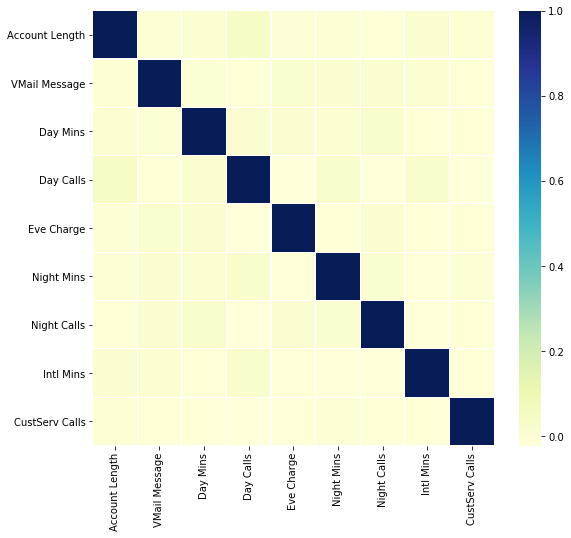

In [34]:
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [35]:
df.head()

,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,415,1.0,0.0,25,265.1,110,30.5,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,1
1,415,1.0,0.0,26,161.6,123,30.5,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,1
2,415,1.0,1.0,0,243.4,114,30.5,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,1
3,408,0.0,1.0,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1
4,415,0.0,1.0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1


In [36]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn?, dtype: int64

In [37]:
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit_transform(X)
X[0]

array([-0.50296721,  0.56383705, -1.36326467,  1.23488274,  1.56676695,
        0.47664315, -0.00700738, -0.0716382 , -0.06178119, -0.07042665,
        0.86674322, -0.46549436,  0.90397563, -0.08500823, -0.62190803,
       -0.09127983, -0.42793202])

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [39]:
X_train.shape,y_train.shape

((2666, 17), (2666,))

In [40]:

from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score

In [41]:

from sklearn.neighbors import KNeighborsClassifier

bestScore=0.0
accList=[]

for k in range(3,12):
    
    clf_knn = KNeighborsClassifier(n_neighbors=k,algorithm='auto')
    
  
    scores = cross_val_score(clf_knn, X, y, cv=10)
    score=scores.mean()
    accList.append(score)
    
    if score > bestScore:
        bestScore=score
        best_clf=clf_knn
        bestK=k
        
print("Best K is :",bestK,"| Cross validation Accuracy :",bestScore)
clf_knn=best_clf

Best K is : 6 | Cross validation Accuracy : 0.8901907895919873


In [42]:
clf_knn.fit(X_train,y_train)
y_pred=best_clf.predict(X_test)

In [43]:
print(jaccard_similarity_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='weighted'))

0.904047976011994
0.8869296248885525


In [44]:
# y_test=y_test.values



In [45]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.6761103479853481

In [46]:

from sklearn import tree

clf_tree = tree.DecisionTreeClassifier()
clf_tree = clf_tree.fit(X_train, y_train)

y_pred=clf_tree.predict(X_test)

In [47]:
print(jaccard_similarity_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='weighted'))

0.8800599700149925
0.8836057743159553


In [48]:
from sklearn import svm

clf_svm = svm.LinearSVC(random_state=7)
clf_svm.fit(X_train, y_train)  

y_pred=clf_svm.predict(X_test)

In [50]:
print(jaccard_similarity_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='weighted'))
print(roc_auc_score(y_test, y_pred))

0.8725637181409296
0.8277816641275948
0.5468463827838828


In [51]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial')
clf_log.fit(X_train, y_train)

y_pred=clf_log.predict(X_test)


In [52]:
print(jaccard_similarity_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='weighted'))
print(roc_auc_score(y_test, y_pred))

0.8740629685157422
0.8400125217805245
0.5754731379731379


In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rc=RandomForestClassifier(n_estimators=10, criterion='entropy', max_features=3)
rc.fit(X_train,y_train)
pred=rc.predict(X_train)
predt=rc.predict(X_test)
scores=cross_val_score(rc, X_train, y_train, cv=10)
n=scores/10

In [54]:
print(n)

[0.09179104 0.09216418 0.09138577 0.0906367  0.08984962 0.09097744
 0.0906015  0.09097744 0.09285714 0.09210526]


In [55]:
print(jaccard_similarity_score(y_test, predt))
print(f1_score(y_test, predt, average='weighted'))


0.9175412293853074
0.9138929252225896
0.7857047466422467


Highest ROC_AUC_SCORE

In [ ]:
print(roc_auc_score(y_test, predt))

In [56]:
from sklearn.ensemble import VotingClassifier
eclf2 = VotingClassifier(estimators=[('lr', rc), ('rf', clf_knn), ('gnb', clf_svm)], voting='hard')
eclf2.fit(X_train, y_train)
y_pred=eclf2.predict(X_test)

C:\Users\pratikk\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [57]:
print(jaccard_similarity_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='weighted'))

0.9070464767616192
0.8885446901273424
